#Esercizio 1

length of the bin_edges container: 10


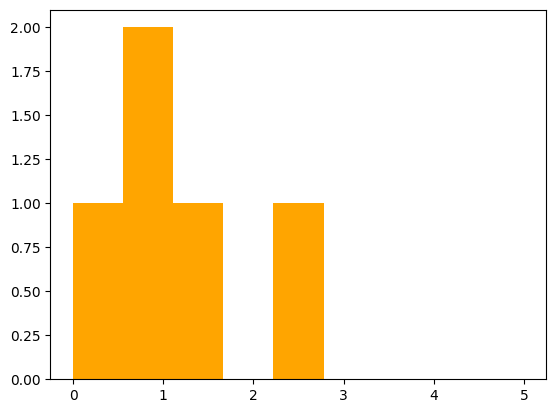

<Figure size 640x480 with 0 Axes>

In [ ]:
#Create a one-dimensional histogram filled with 5 values and save the histogram image to a png file

import numpy as np
import matplotlib.pyplot as plt

sample=[0.1,0.8,1.1,1.5,2.3] #inputs
N_bins=10

bin_edges = np.linspace (0, 5, N_bins)  #con linspace ho il numero di bin equispaziati tra xmin  e xmax fissati
print ('length of the bin_edges container:', len (bin_edges))  #lunbghezza del bin
fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (sample,
         bins = bin_edges,
         color = 'orange',
        )
plt.show()
plt.savefig('my_figure.png')

#esercizio 2:


In [10]:
#es2:
      #Print the first 10 positive elements to the screen.
     #Count the number of events contained in the file.
    #Determine the minimum and maximum values among the numbers saved in the file.
import numpy as np
import matplotlib.pyplot as plt

import os
os.listdir()

#def main():

data = np.loadtxt('sample_data/eventi_unif.txt')
#data=[1,2,3,4,5,6,7,8,11,-3,1,1,1,1,1,1,1,9]
#with open ('eventi_unif.txt') as input_file:
    #sample = [float (x) for x in input_file.readlines()]

#print('Data array shape: ',data.shape)         #la lunghezza dell'oggetto data
print('numero di eventi: ' , len(data))
#datapos=np.where(data > 0)  [funzione where di np]
#print(datapos[:10])


#STAMPO I PRIMI 10 VALORI POSITIVI:

save=[]  #array di supporto per salvare e stampare i valori positivi

for i in range(0,len(data)):
  if data[i]>0:
    save.append(data[i])
  else:
    continue
for i in range(0,10): #voglio solo i primi 10 valori positivi
 if save[i]>0 : print(save[i])



print("il massimo valore dei dati è : " , np.max(data))
print("il minimo valore dei dati è : " , np.min(data))
#if __name__ == "__name__":
   #main()

numero di eventi:  10000
1.74343
0.881333
2.94428
2.73867
3.56551
0.547841
3.55342
6.35506
2.54804
4.95112
il massimo valore dei dati è :  6.99967
il minimo valore dei dati è :  -3.99968


#Esercizio 3:


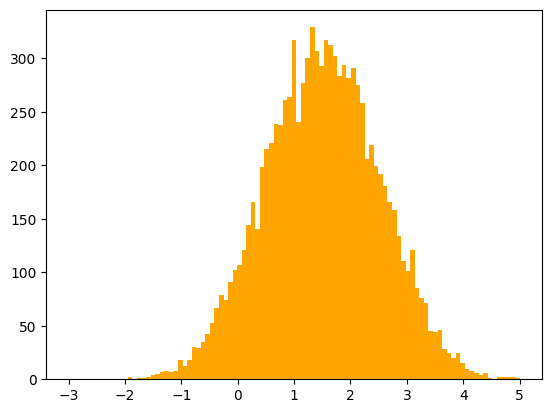

In [13]:
#Read the text file eventi_gauss.txt:

    #Fill a histogram with the first N numbers contained in the file, where N is a command-line parameter during program execution.

    #Choose the histogram’s definition range and its bin number based on the numbers to be represented.
import numpy as np
import matplotlib.pyplot as plt

import os    #comando per capire come scrivere il path per trovare il file txt
os.listdir()

#sample = np.genfromtxt(".txt")
sample = np.genfromtxt("sample_data/eventi_gauss.txt") #non mi

#input: è il file di testo da leggere dato per dato

N_bins=100   #ANDREBBE USATA LA REGOLA DI STURGES E I COMANDI SUI PARAMETRI TRAMITE SYS (guarda soluzione)
x_min=-3
x_max=5

bin_edges = np.linspace (x_min, x_max, N_bins)

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (sample,
         bins = bin_edges,
         color = 'orange',
        )
plt.show()


#SOLUZIONE esercizio 3:


In [18]:
#!/usr/bin/python

import sys
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, floor


def sturges (N_events) :
    return ceil (1 + 3.322 * np.log (N_events))


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----


def main () :
    '''
    Funzione che implementa il programma principale
    '''

    if (len (sys.argv) < 3) :
        print ('usage:', sys.argv[0], 'eventi_gauss.txt')
        sys.exit ()

    #N_max = int (sys.argv[2])
    N_max=100
    # read the file
    with open(sys.argv[1]) as f: #sys.arg[1] è l'array-file txt (puoi usare anche load.txt..)
        sample = [float (x) for x in f.readlines()]

    xMin = floor (min (sample[:N_max]))
    xMax = ceil (max (sample[:N_max]))
    N_bins = sturges (N_max)

    bin_edges = np.linspace (xMin, xMax, N_bins)
    fig, ax = plt.subplots (nrows = 1, ncols = 1)
    ax.hist (sample[:N_max],
             bins = bin_edges,
             color = 'orange',
            )
    ax.set_title ('Histogram example', size=14)
    ax.set_xlabel ('variable')
    ax.set_ylabel ('event counts per bin')

    #plt.savefig ('ex_3.3.png')


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----


if __name__ == "__main__":
    main ()


FileNotFoundError: ignored

#Esercizio 4

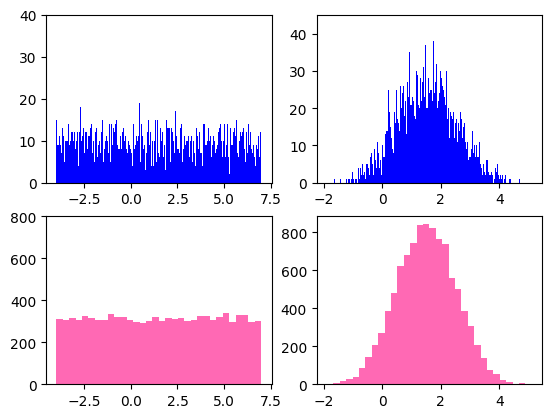

In [25]:
#Display the distributions of events from the two files of the previous exercises, overlaid,
#finding the best visualization for the comparison between the two histograms.
#Display the distributions of events from the two files of the previous exercises, overlaid,
#finding the best visualization for the comparison between the two histograms.

import numpy as np
import matplotlib.pyplot as plt
from math import ceil

def sturges (N_events) :
    return ceil (1 + 3.322 * np.log (N_events))

#def main():

data1 = np.genfromtxt('sample_data/eventi_unif.txt')
data2 = np.genfromtxt('sample_data/eventi_gauss.txt')

N_bins=int(max(len(data1),len(data2))/10) #andrebbero messi il val min e max e poi creato un vett equispaziato!

N_bins_optimized=sturges(len(data1)) #len(data1) da il numero di eventi. (avrei potuto mettere anche len(data2), è lo stesso in questo caso.

fig, axes = plt.subplots(2,2)

axes[0,0].hist(data1,
              bins=N_bins,
              label='eventi unif',
              color='blue'
              )
axes[0,0].set_ylim([0,40]) #cosi rendo confrontabili i grafici: il range prima andava da 0 a 20

axes[0,1].hist(data2,
              bins=N_bins,
              label='eventi gauss',
              color='blue'
              )


axes[1,0].hist(data1,
              bins=N_bins_optimized,
              color='hotpink'
              )
axes[1,0].set_ylim([0,800])


axes[1,1].hist(data2,
              bins=N_bins_optimized,
              label='eventi gauss',
              color='hotpink'
              )


plt.show()



#soluzione esercizio 4:

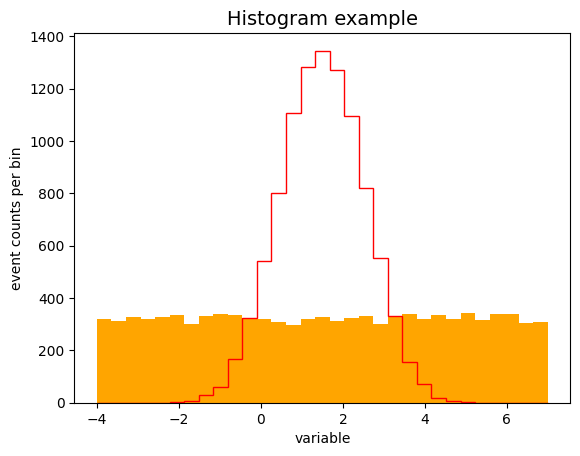

In [26]:
#!/usr/bin/python
'''
## Exercise 3.4
  * Display the distributions of events from the two files of the previous exercises, overlaid,
    finding the best visualization for the comparison between the two histograms.
'''

#import sys
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, floor


def sturges (N_events) :
    return ceil (1 + 3.322 * np.log (N_events))


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----


def main () :
    '''
    Funzione che implementa il programma principale
    '''

    #if (len (sys.argv) < 3) :
        #print ('usage:', sys.argv[0], 'inputfile1.txt inputfile2.txt')
        #sys.exit ()

    # read the files
    #with open(sys.argv[1]) as f:
        #sample_1 = [float (x) for x in f.readlines()]
    #with open(sys.argv[2]) as f:
        #sample_2 = [float (x) for x in f.readlines()]
    sample_1 = np.genfromtxt('sample_data/eventi_unif.txt')
    sample_2= np.genfromtxt('sample_data/eventi_gauss.txt')



    xMin = floor (min (min (sample_1), min (sample_2))) #ci serviranno per creare un binning omogeneo per tutti i campioni
    xMax = ceil (max (max (sample_1), max (sample_2)))
    N_bins = sturges (min (len (sample_1), len (sample_2)))

    bin_edges = np.linspace (xMin, xMax, N_bins) #è un vettore equispaziato (noi invece avevamo messo un numero direttamente)

    fig, ax = plt.subplots (nrows = 1, ncols = 1)
    ax.hist (sample_1,
             bins = bin_edges,
             color = 'orange',
            )
    # ax.hist (sample_2,
    #          bins = bin_edges,
    #          color = 'red',
    #          alpha = 0.5,
    #         )
    ax.hist (sample_2,
             bins = bin_edges,
             color = 'red',
             histtype='step',
            )
    ax.set_title ('Histogram example', size=14)
    ax.set_xlabel ('variable')
    ax.set_ylabel ('event counts per bin')

    plt.savefig ('ex_3.4.png')


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----


if __name__ == "__main__":
    main ()


#ESercizio 5:

In [ ]:
#es.5
#Read the text file eventi_unif.txt:
#Calculate the mean of the numbers in the text file.
# Calculate the variance of the numbers in the text file.
# Calculate the standard deviation of the numbers in the text file.
# Calculate the standard deviation from the mean of the numbers in the text file.


import numpy as np
import matplotlib.pyplot as plt


def mean(x):

    m = np.sum(x)/len(x)
    return m


def stdev(x,bessel=True):

    m = mean(x)
    r = x-m
    s = np.sqrt( np.sum(r*r)/(len(x)-1) ) if bessel else np.sqrt( np.sum(r*r)/len(x) )
    return s

def stdev_mean(x,bessel=True):

    s = stdev(x,bessel)
    return s/np.sqrt(len(x))



def main():

 data = np.loadtxt('eventi_unif.txt')
 print(mean(data))

if __name__ == "__name__":
   main()
